### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [130]:
import tensorflow as tf
tf.random.set_seed(42)

In [131]:
print(tf.__version__)

2.0.0


In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Collect Data

In [133]:
from tensorflow import keras
mnist=keras.datasets.fashion_mnist

In [134]:
(trainX, trainY), (testX, testY) = mnist.load_data()

In [135]:
print(testY[0:5])

[9 2 1 1 6]


In [136]:
np.max(trainX)

255

In [137]:
trainX.shape

(60000, 28, 28)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [138]:
tf.keras.utils.to_categorical(trainY)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [139]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

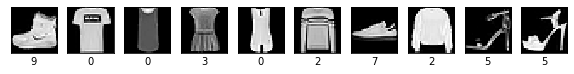

label for each of the above image:
 [9 0 0 3 0 2 7 2 5 5]


In [140]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary_r)
    plt.xlabel(trainY[i])
plt.show()
print('label for each of the above image:\n',trainY[0:10])

In [141]:
L=pd.DataFrame(trainY)
L[0].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64

In [142]:
testX.shape

(10000, 28, 28)

In [143]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Dropout, Activation

In [144]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [145]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                510       
Total params: 118,940
Trainable params: 118,940
Non-trainable params: 0
_________________________________________________________________


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [148]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Execute the model using model.fit()

In [149]:
model.fit(trainX,trainY,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 200us/sample - loss: 122896215.6178 - accuracy: 0.0983
Epoch 2/10
60000/60000 [==============================] - 8s 139us/sample - loss: 2.3027 - accuracy: 0.0989
Epoch 3/10
60000/60000 [==============================] - 7s 123us/sample - loss: 2.3027 - accuracy: 0.0990
Epoch 4/10
60000/60000 [==============================] - 8s 127us/sample - loss: 2.3027 - accuracy: 0.0981
Epoch 5/10
60000/60000 [==============================] - 8s 129us/sample - loss: 2.3027 - accuracy: 0.0987
Epoch 6/10
60000/60000 [==============================] - 8s 129us/sample - loss: 2.3027 - accuracy: 0.0998
Epoch 7/10
60000/60000 [==============================] - 8s 141us/sample - loss: 2.3027 - accuracy: 0.0985
Epoch 8/10
60000/60000 [==============================] - 7s 122us/sample - loss: 2.3027 - accuracy: 0.0986
Epoch 9/10
60000/60000 [==============================] - 8s 129us/sample - loss: 2.3027 - accuracy: 0.0

In [150]:
score=model.evaluate(testX,testY)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [151]:
print(score)

[2.3026018825531005, 0.1]


In [154]:
y_predict=model.predict(testX)
y_predict[2]

array([0.10041691, 0.10074882, 0.10007693, 0.09993999, 0.10012037,
       0.09998497, 0.100665  , 0.09857767, 0.09974228, 0.09972714],
      dtype=float32)

In [155]:
np.argmax(y_predict[2])

1

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [156]:
from tensorflow.keras.layers import BatchNormalization
bn=BatchNormalization()
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
#model.add(bn())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [157]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Execute the model

In [158]:
model.fit(trainX,trainY,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 138us/sample - loss: nan - accuracy: 0.1000
Epoch 2/10
60000/60000 [==============================] - 8s 127us/sample - loss: nan - accuracy: 0.1000
Epoch 3/10
60000/60000 [==============================] - 8s 129us/sample - loss: nan - accuracy: 0.1000
Epoch 4/10
60000/60000 [==============================] - 7s 123us/sample - loss: nan - accuracy: 0.1000
Epoch 5/10
60000/60000 [==============================] - 8s 136us/sample - loss: nan - accuracy: 0.1000
Epoch 6/10
60000/60000 [==============================] - 8s 126us/sample - loss: nan - accuracy: 0.1000
Epoch 7/10
60000/60000 [==============================] - 7s 125us/sample - loss: nan - accuracy: 0.1000
Epoch 8/10
60000/60000 [==============================] - 8s 126us/sample - loss: nan - accuracy: 0.1000
Epoch 9/10
60000/60000 [==============================] - 9s 143us/sample - loss: nan - accuracy: 0.1000
Epoch 10/10
60000/60000 [=======

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [161]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
#optimizer.learning_rate.assign(0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'] )

In [162]:
model.fit(trainX, trainY, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 144us/sample - loss: nan - accuracy: 0.1000
Epoch 2/10
60000/60000 [==============================] - 8s 130us/sample - loss: nan - accuracy: 0.1000
Epoch 3/10
60000/60000 [==============================] - 7s 123us/sample - loss: nan - accuracy: 0.1000
Epoch 4/10
60000/60000 [==============================] - 8s 137us/sample - loss: nan - accuracy: 0.1000
Epoch 5/10
60000/60000 [==============================] - 8s 134us/sample - loss: nan - accuracy: 0.1000
Epoch 6/10
60000/60000 [==============================] - 8s 130us/sample - loss: nan - accuracy: 0.1000
Epoch 7/10
60000/60000 [==============================] - 8s 138us/sample - loss: nan - accuracy: 0.1000
Epoch 8/10
60000/60000 [==============================] - 8s 133us/sample - loss: nan - accuracy: 0.1000
Epoch 9/10
60000/60000 [==============================] - 8s 133us/sample - loss: nan - accuracy: 0.1000
Epoch 10/10
60000/60000 [=======

In [163]:
score=model.evaluate(testX, testY)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [164]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [170]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [165]:
optimizer_new=tf.keras.optimizers.SGD(learning_rate=.03)
model.compile(optimizer=optimizer_new, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [166]:
model.fit(trainX, trainY, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 8s 134us/sample - loss: 1.1000 - accuracy: 0.6699
Epoch 2/2
60000/60000 [==============================] - 7s 122us/sample - loss: 0.8371 - accuracy: 0.7127


In [168]:
model.evaluate(testX, testY)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.8641921364307403, 0.6767]

For learning rate .03; loss increased drastically and hence lead to drop in accuracy. Furthermore, Model with learning rate.001 is best model to use

## Review model

In [178]:
from sklearn import metrics
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(testY,y_pred)
print(cm)

[[753  69  30  68   8   0  47   0  23   2]
 [  5 946  13  24   8   0   2   0   2   0]
 [ 17  11 811   4  78   0  70   0   8   1]
 [ 50 153  17 704  38   0  33   0   5   0]
 [  0  55 689  44 174   0  29   0   8   1]
 [  1   1   0   0   0 567   0 244  19 168]
 [187  72 514  47  55   0  92   0  33   0]
 [  0   0   0   0   0  11   0 879   0 110]
 [  0   3  43   7   1   2  17  12 906   9]
 [  1   0   0   0   0   1   0  62   1 935]]


### Run the model